In [7]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Discussion
Evaluating questions, or nodes, requires us to introduce two additional concepts from a field known as information theory_: _information gain and entropy.

Entropy is a term you may be familiar with from other disciplines, particularly the sciences, where it means disorder. Here it will mean something along the lines of uncertainty.
As we limit the possible number of outcomes and become more confident in the outcome, the entropy decreases. An area of the tree with only one possible outcome has zero entropy because there is no uncertainty. To delve into the reason for the logarithmic term here would require a deeper dive into information theory than we're going to do in this course, but you can find an explanation of it in this primer on Shannon Entropy.

We can then use entropy to measure the information gain, defined as the change in entropy from the original state to the weighted potential outcomes of the following state.

One method of designing an efficient decision tree is to gain the most information as quickly as possible.

Primer: https://arxiv.org/pdf/1405.2061.pdf

In [16]:
!conda install graphviz python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.38.0              |       h1de35cc_0         341 KB
    python-graphviz-0.13.2     |             py_0          24 KB
    ------------------------------------------------------------
                                           Total:      

In [17]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [18]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

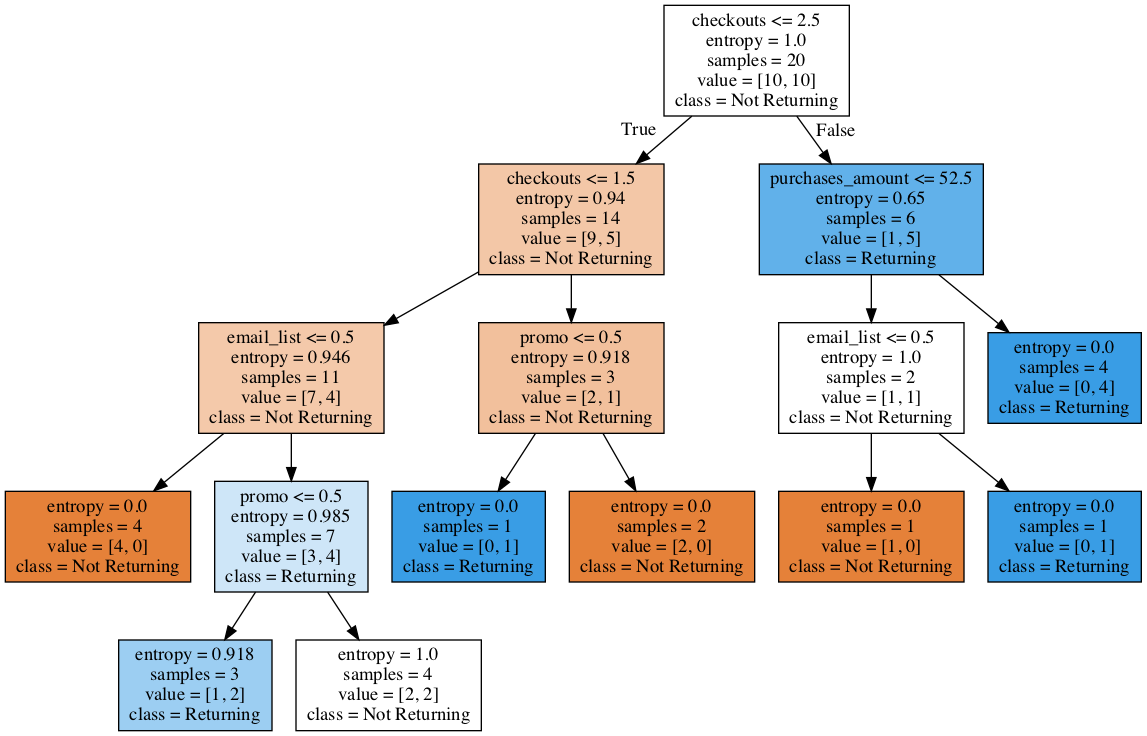

In [19]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

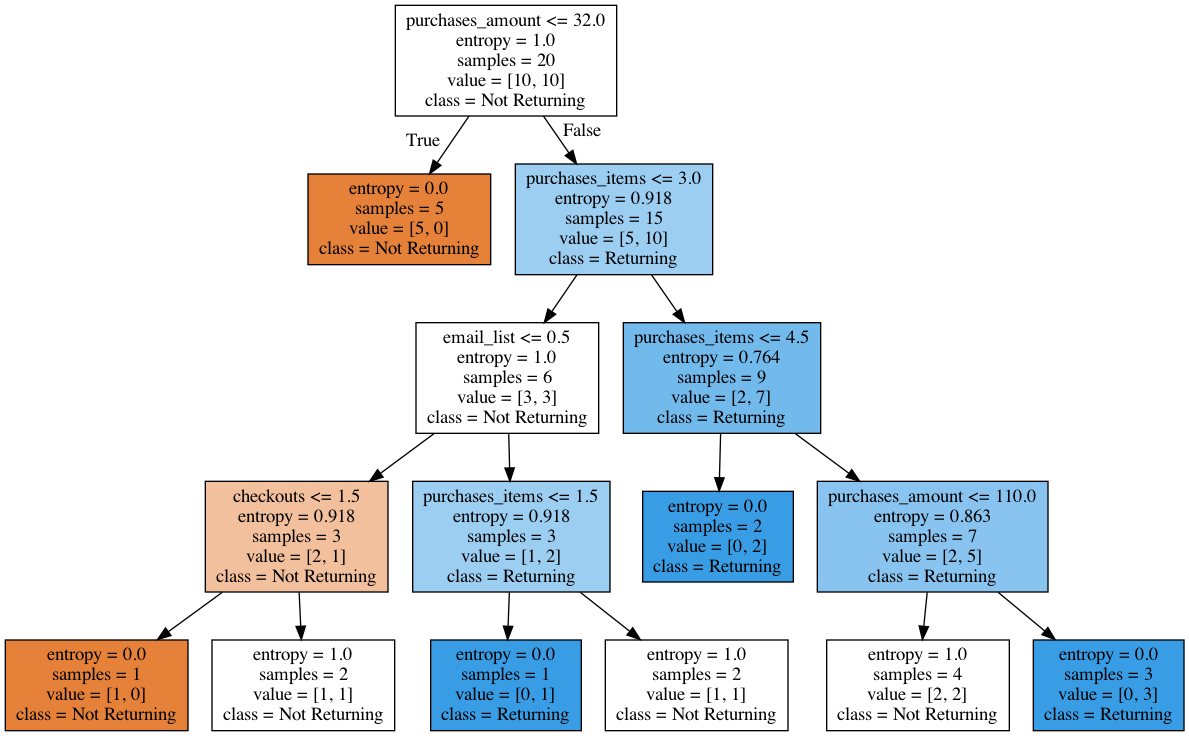

In [14]:
#Remove Random State
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Removing Random State removed 'True' nodes on the left.

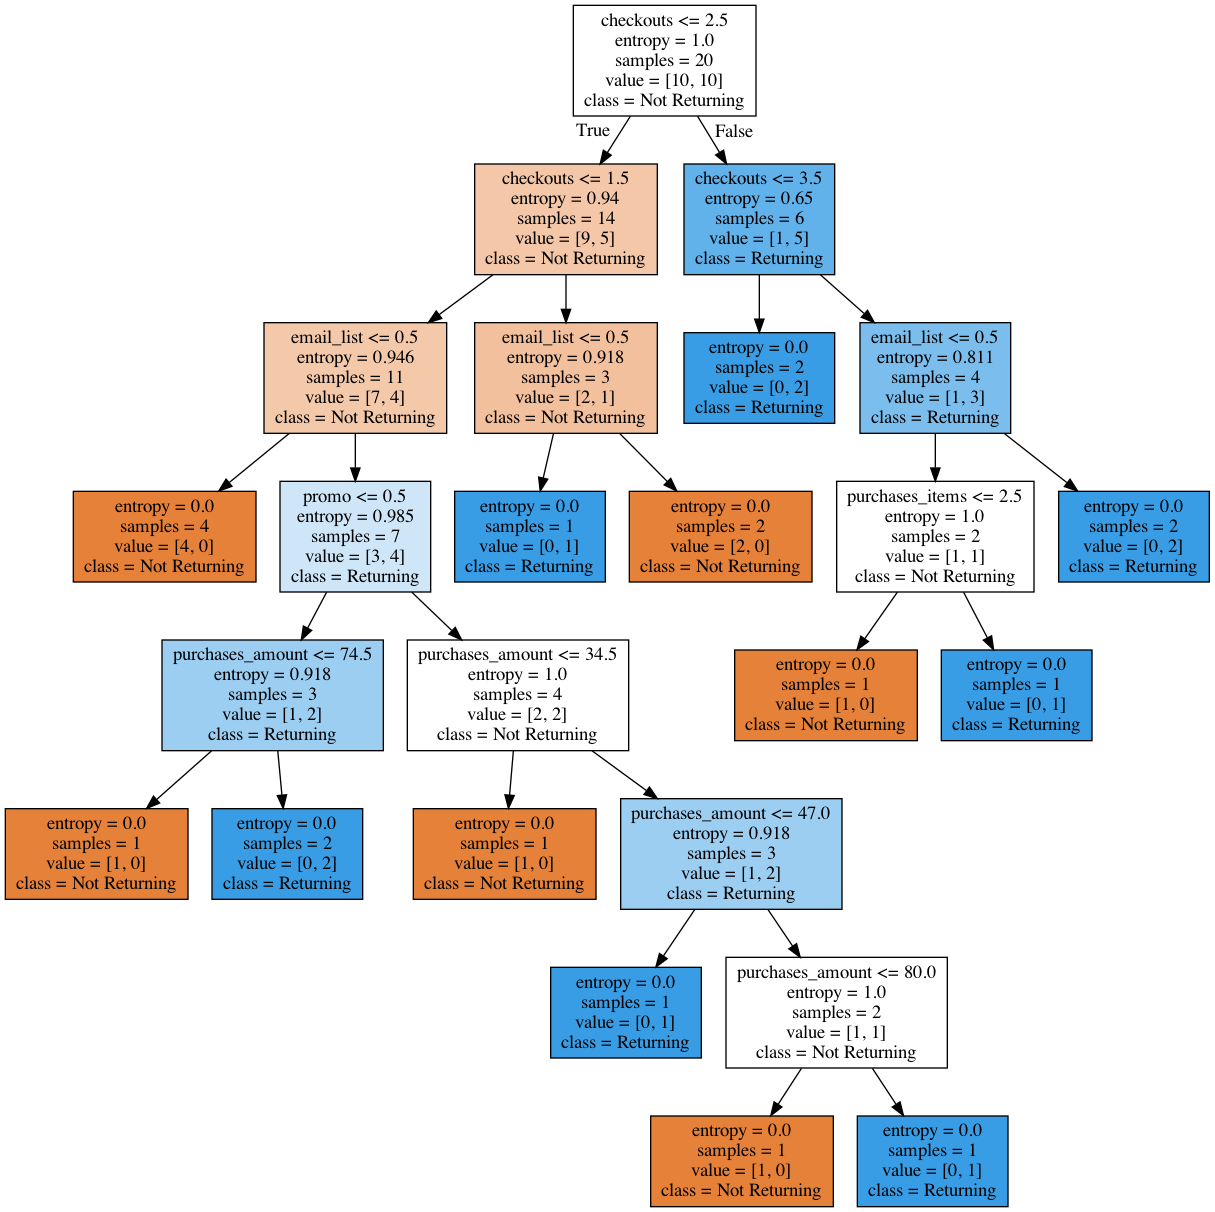

In [15]:
#Change max_depth from '4' to '7'
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=7,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Adding more to the 'max_depth' added more rows of nodes in our tree. 


# Algorithm

In [ ]:
import math

#find item in a list
def find(item, list):
    for i in list:
        if item(i): 
            return True
        else:
            return False
#Step 1: Find most common item among attribute
#Step 2: For each value v(1) of each attribute a(1), calculate the entropy.
#If all observations are 'A', label root node 'A' and return.
    #If all observations are 'B', label root node 'B' and return.
   # If no attributes return the root note labeled with the most common Outcome.

#Step 3: Split the tree to next line below based on the rule a(1) = v(1)
#Step 4: Calculate Entropies for all possible values: v(1) to v(100)
       #attribute value pair with the lowest entropy is then the best attribute and the attribute you give to the node.
#Step 5: Calculates the information from attribute 'gain' (reduction in entropy) that would result by splitting the data on the chosen attribute (attr).

#Step 6:  # Subtract the entropy of the chosen attribute from the entropy of the
    # whole data set with respect to the target attribute (and return it)
#find most common value for an attribute
def majority(attributes, data, target):
    #find target attribute
    valFreq = {}
    #find target in data
    index = attributes.index(target)
    #calculate frequency of values in target attr
    for tuple in data:
        if (valFreq.has_key(tuple[index])):
            valFreq[tuple[index]] += 1 
        else:
            valFreq[tuple[index]] = 1
    max = 0
    major = ""
    for key in valFreq.keys():
        if valFreq[key]>max:
            max = valFreq[key]
            major = key
    return major

#Calculates the entropy of the given data set for the target attr
def entropy(attributes, data, targetAttr):

    valFreq = {}
    dataEntropy = 0.0
    
    #find index of the target attribute
    i = 0
    for entry in attributes:
        if (targetAttr == entry):
            break
        ++i
    
    # Calculate the frequency of each of the values in the target attr
    for entry in data:
        if (valFreq.has_key(entry[i])):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0

    # Calculate the entropy of the data for the target attr
    for freq in valFreq.values():
        dataEntropy += (-freq/len(data)) * math.log(freq/len(data), 2) 
        
    return dataEntropy

def gain(attributes, data, attr, targetAttr):
    """
    Calculates the information gain (reduction in entropy) that would
    result by splitting the data on the chosen attribute (attr).
    """
    valFreq = {}
    subsetEntropy = 0.0
    
    #find index of the attribute
    i = attributes.index(attr)

    # Calculate the frequency of each of the values in the target attribute
    for entry in data:
        if (valFreq.has_key(entry[i])):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0
    # Calculate the sum of the entropy for each subset of records weighted
    # by their probability of occuring in the training set.
    for val in valFreq.keys():
        valProb        = valFreq[val] / sum(valFreq.values())
        dataSubset     = [entry for entry in data if entry[i] == val]
        subsetEntropy += valProb * entropy(attributes, dataSubset, targetAttr)

    # Subtract the entropy of the chosen attribute from the entropy of the
    # whole data set with respect to the target attribute (and return it)
    return (entropy(attributes, data, targetAttr) - subsetEntropy)

#choose best attibute 
def chooseAttr(data, attributes, target):
    best = attributes[0]
    maxGain = 0;
    for attr in attributes:
        newGain = gain(attributes, data, attr, target) 
        if newGain>maxGain:
            maxGain = newGain
            best = attr
    return best

#get values in the column of the given attribute 
def getValues(data, attributes, attr):
    index = attributes.index(attr)
    values = []
    for entry in data:
        if entry[index] not in values:
            values.append(entry[index])
    return values

def getExamples(data, attributes, best, val):
    examples = [[]]
    index = attributes.index(best)
    for entry in data:
        #find entries with the give value
        if (entry[index] == val):
            newEntry = []
            #add value if it is not in best column
            for i in range(0,len(entry)):
                if(i != index):
                    newEntry.append(entry[i])
            examples.append(newEntry)
    examples.remove([])
    return examples

def makeTree(data, attributes, target, recursion):
    recursion += 1
    #Returns a new decision tree based on the examples given.
    data = data[:]
    vals = [record[attributes.index(target)] for record in data]
    default = majority(attributes, data, target)

    # If the dataset is empty or the attributes list is empty, return the
    # default value. When checking the attributes list for emptiness, we
    # need to subtract 1 to account for the target attribute.
    if not data or (len(attributes) - 1) <= 0:
        return default
    # If all the records in the dataset have the same classification,
    # return that classification.
    elif vals.count(vals[0]) == len(vals):
        return vals[0]
    else:
        # Choose the next best attribute to best classify our data
        best = chooseAttr(data, attributes, target)
        # Create a new decision tree/node with the best attribute and an empty
        # dictionary object--we'll fill that up next.
        tree = {best:{}}
    
        # Create a new decision tree/sub-node for each of the values in the
        # best attribute field
        for val in getValues(data, attributes, best):
            # Create a subtree for the current value under the "best" field
            examples = getExamples(data, attributes, best, val)
            newAttr = attributes[:]
            newAttr.remove(best)
            subtree = makeTree(examples, newAttr, target, recursion)
    
            # Add the new subtree to the empty dictionary object in our new
            # tree/node we just created.
            tree[best][val] = subtree
    
    return tree

# Random Forest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
   # Replace the path with the correct path for your data.
    # Users/mehrunisaqayyum/Downloads/LoanStats3d.csv
    # 'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1'
y2015 = pd.read_csv('/Users/mehrunisaqayyum/Downloads/LoanStats3d.csv',
    skipinitialspace=True,
    header=1)


# Note the warning about dtypes.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


## Data Cleaning
### SKIP running Kernel 'Don't Run'  because...
The too much energy to run; need to cut down data amount. SKLearn requires the independent variables to be be numeric, and all we want is dummy variables so let's use get_dummies from Pandas to generate a dummy variable for every categorical column and see what happens off of this kind of naive approach

In [ ]:
#Don't RUN 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

### Note: Identify columns with less than 30 unique values.


In [15]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


### Analysis: 
We see that the following columns (variables) have less than 30 unique values:
- 'verification_status_joint'
- 'application_type'
- 'initial_list_status'

- 'last_pymnt_d'
- 'next_pymnt_d'
- 'last_credit_pull_d'
- 'term'
- 'grade' 
- 'emp_length'
- 'home_ownership'
- 'verification_status'
- 'issue_d'
- 'loan_status'
- 'pymnt_plan'
- 'purpose'

In [16]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [17]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Missing two rows of data
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [19]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421090,36371250.0,39102635.0,10000.0,10000.0,10000.0,11.99,332.10,31000.0,28.69,0.0,...,0,0,0,0,0,1,0,0,0,0
421091,36441262.0,39152692.0,24000.0,24000.0,24000.0,11.99,797.03,79000.0,3.90,0.0,...,0,0,0,0,0,1,0,0,0,0
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,15.99,316.07,35000.0,30.90,0.0,...,0,0,0,0,0,1,0,0,0,0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,19.99,317.86,64400.0,27.19,1.0,...,0,0,1,0,0,1,0,0,0,0


In [11]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

array([0.97432975, 0.98036143, 0.98162   , 0.98157251, 0.97373545,
       0.97846117, 0.97095633, 0.98057422, 0.98024082, 0.98040659])

## Task
Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [20]:
import seaborn as sns
import math
# from matplotlib.mlab import PCA as mlabPCA # deprecated
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

In [36]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 657 to 17286
Columns: 103 entries, id to total_il_high_credit_limit
dtypes: float64(87), int64(1), object(15)
memory usage: 4.1+ KB


## Data Cleaning

### Observation 'Term' ColumnDrop months from in 'term column' to leave as numeric

In [32]:
type('term')

str

In [41]:
y2015['term'] = pd.to_numeric(y2015['term'].str.strip(' months'), errors='coerce')
print(y2015['term'])

AttributeError: Can only use .str accessor with string values!

In [34]:
print(term.strip(' months'))

NameError: name 'term' is not defined

## Data Feature Exploration
Run a correlation matrix

In [21]:
y2015.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.997540,-0.008288,-0.008288,-0.008554,-0.053402,-0.012919,0.015055,0.005692,0.002300,...,-0.000612,0.008886,-0.010366,-0.034963,0.004595,-0.000991,0.015609,0.012864,0.017944,0.020870
member_id,0.997540,1.000000,-0.008620,-0.008620,-0.008885,-0.053447,-0.013274,0.014958,0.005806,0.002261,...,-0.000700,0.008723,-0.010437,-0.034596,0.004625,-0.000908,0.015297,0.012688,0.017822,0.020684
loan_amnt,-0.008288,-0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,-0.010424,...,-0.031334,-0.042158,0.105056,0.031516,-0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt,-0.008288,-0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,-0.010424,...,-0.031334,-0.042158,0.105056,0.031516,-0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt_inv,-0.008554,-0.008885,0.999994,0.999994,1.000000,0.140209,0.941187,0.305803,0.006044,-0.010448,...,-0.031349,-0.042263,0.105096,0.031382,-0.124394,0.002070,0.347355,0.289554,0.395973,0.203085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,-0.000991,-0.000908,0.002087,0.002087,0.002070,0.012234,0.010279,0.038323,-0.014954,0.011366,...,0.000522,0.018948,-0.039201,-0.022124,0.035171,1.000000,-0.001663,-0.005317,-0.030412,0.006025
tot_hi_cred_lim,0.015609,0.015297,0.347289,0.347289,0.347355,-0.121081,0.315373,0.391129,-0.000674,0.059349,...,0.001565,0.060212,0.028388,-0.013616,-0.123095,-0.001663,1.000000,0.515390,0.405070,0.394185
total_bal_ex_mort,0.012864,0.012688,0.289565,0.289565,0.289554,-0.000676,0.265224,0.297563,0.100831,0.026929,...,0.007560,0.103249,0.079978,0.068521,-0.089675,-0.005317,0.515390,1.000000,0.294523,0.864517
total_bc_limit,0.017944,0.017822,0.395843,0.395843,0.395973,-0.257222,0.358718,0.257184,0.012969,-0.081793,...,-0.064465,0.007709,0.229307,-0.197520,-0.168662,-0.030412,0.405070,0.294523,1.000000,0.102987


### Analysis:
We see that the following variables are moderately to highly correlated with each other--especially in the financial columns related to payment amount or outstanding principal:

- 'loan_amnt' with 'tot_hi_cred_lim' and 'total_bc_limit'
- Similarly, same with both: 'funded_amnt_inv' and 'funded_amnt' with 'tot_hi_cred_lim' and 'total_bc_limit'

- 'int_rate' with 'total_bc_limit'
- 'installment' highly correlated with 'loan amnt' and 'funded_amnt' and ' funded)amnt_inv'
- 'installment' moderately correlated with 'tot_hi_cred_lim' and 'tal-bal_ex-mort' and 'total_bc_limit'
- 'tot_hi_cred_lim' with 'total_il_high_credit_limit' and 'total_bc_limit' and 'total_bal_ex_mort'	

- 'pct_tl_nvr_dlq' with 'total_bc_limit'

In [23]:
y2015 = y2015.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(y2015)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

ValueError: could not convert string to float: ' 36 months'

## PCA

# CHALLENGE
Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree.

In [ ]:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))